## Question 3A
Take grayscale image of size $512\times512$, add some salt & pepper noise and apply average and median spatial filter with $5\times5$ mask and observe their performance for noise suppression in term of PSNR.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

In [2]:
def add_noise(input):
    row, col = input.shape

    # adding some salt
    number_of_pixel = random.randint(3000, 5000)
    for i in range(number_of_pixel):
        y_cor = random.randint(0, row-1)
        x_cor = random.randint(0, col-1)
        input[y_cor][x_cor] = 255
    # adding some peeper
    for i in range(number_of_pixel):
        y_cor = random.randint(0, row-1)
        x_cor = random.randint(0, col-1)
        input[y_cor][x_cor] = 0

    return input

In [3]:
# previously implemented function
def average_filter(image, kernel_size):
    kernel_left = kernel_size//2
    kernel_right = kernel_left+1
    average_mask = np.ones((kernel_size, kernel_size))/(kernel_size * kernel_size)
    height, width = image.shape

    filter_image = np.zeros_like(image)
    for i in range(kernel_left, height-kernel_left):
        for j in range(kernel_left, width-kernel_left):
            average_value = np.sum(
                average_mask * image[i-kernel_left: i+kernel_right, j-kernel_left: j+kernel_right])
            filter_image[i, j] = average_value

    return filter_image

# new implemented function
def get_average_filtered_image(input, mask_dim):
    mask_x = mask_dim
    mask_y = mask_dim

    height, width = input.shape
    average_image = np.zeros((height, width), dtype=np.uint8)
    temp_image_segment = np.zeros((mask_x, mask_y), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            for l in range(mask_y):
                for r in range(mask_x):
                    temp_image_segment[l, r] = input[(i-(mask_x//2)+l)%height, (j-(mask_y//2)+r)%width]

            average_image[i, j] = np.mean(temp_image_segment)

    return average_image

In [4]:
# previously implemented function
def median_filter(image, kernel_size):
    kernel_left = kernel_size//2
    kernel_right = kernel_left+1
    median_mask = np.ones((kernel_size, kernel_size))
    height, width = image.shape

    filter_image = np.zeros_like(image)
    for i in range(kernel_left, height-kernel_left):
        for j in range(kernel_left, width-kernel_left):
            median_value = np.median(
                median_mask * image[i-kernel_left: i+kernel_right, j-kernel_left: j+kernel_right])
            filter_image[i, j] = median_value

    return filter_image


# new implemented function
def get_median_filtered_image(input, mask_dim):
    mask_x = mask_dim
    mask_y = mask_dim

    height, width = input.shape
    median_image = np.zeros((height, width), dtype=np.uint8)
    temp_image_segment = np.zeros((mask_x, mask_y), dtype=np.uint8)

    for i in range(0, height):
        for j in range(0, width):
            for l in range(0, mask_y):
                for r in range(0, mask_x):
                    temp_image_segment[l, r] = input[(i-(mask_x//2)+l)%height, (j-(mask_y//2)+r)%width]

            median_image[i, j] = np.median(temp_image_segment)

    return median_image

In [5]:
def calculate_psnr(original_img, processed_img):
    original_img = original_img.astype(np.float64)
    processed_img = processed_img.astype(np.float64)
    max_pixel_value = 255
    mse = np.mean((original_img - processed_img) ** 2)
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    return psnr

In [6]:
original_image = plt.imread('peppers2.tif').copy()
noisy_image = add_noise(original_image.copy())
average_filtered_image = get_average_filtered_image(original_image.copy(), 5)
median_filtered_image = get_median_filtered_image(original_image.copy(), 5)

In [7]:
noisy_image_psnr = calculate_psnr(original_image, noisy_image)
average_filter_psnr = calculate_psnr(original_image, average_filtered_image)
median_filter_psnr = calculate_psnr(original_image, median_filtered_image)

Text(0.5, 1.0, 'Median Image - PSNR 30.495128839748347')

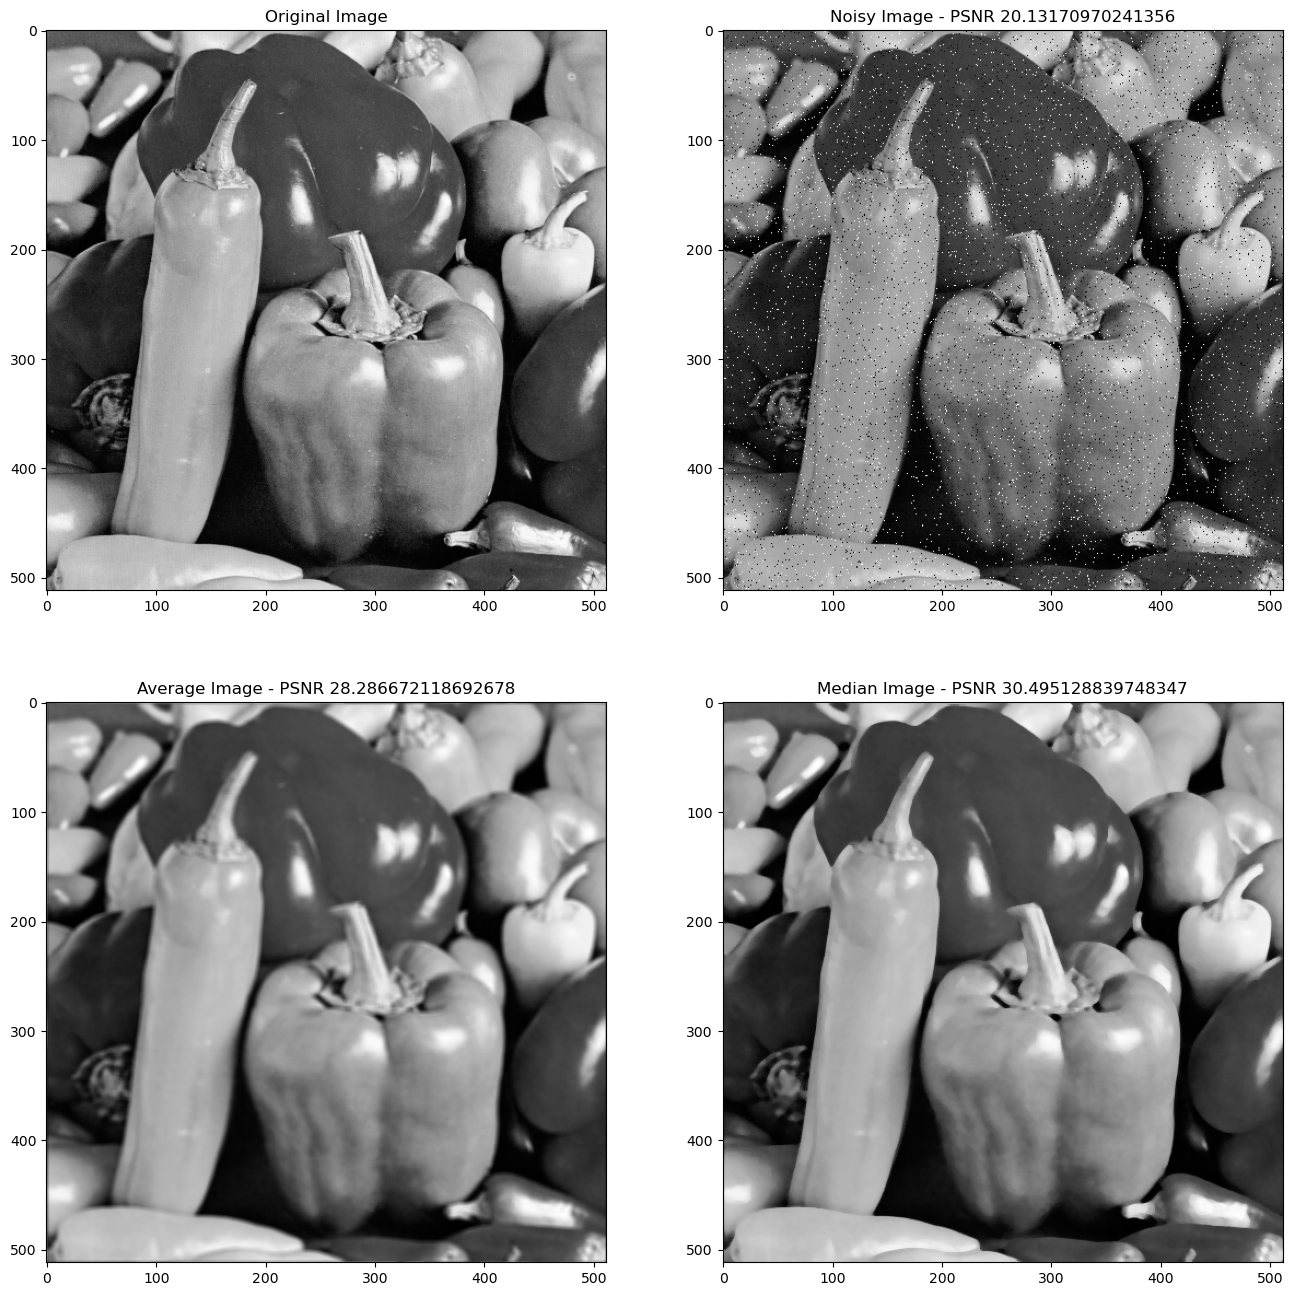

In [8]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(original_image, cmap="gray")
plt.title("Original Image")
plt.subplot(222)
plt.imshow(noisy_image, cmap="gray")
plt.title("Noisy Image - PSNR "+str(noisy_image_psnr))
plt.subplot(223)
plt.imshow(average_filtered_image, cmap="gray")
plt.title("Average Image - PSNR "+str(average_filter_psnr))
plt.subplot(224)
plt.imshow(median_filtered_image, cmap="gray")
plt.title("Median Image - PSNR "+str(median_filter_psnr))